Practical 2 : Linear regression [Admission.csv]

In [2]:
!pip install jupyterthemes

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context = 'notebook',ticks=True,grid = False)

In [4]:
admission_df = pd.read_csv('Admission_Predict.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
admission_df.drop('Serial No.',axis=1,inplace=True)

In [6]:
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df_university = admission_df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

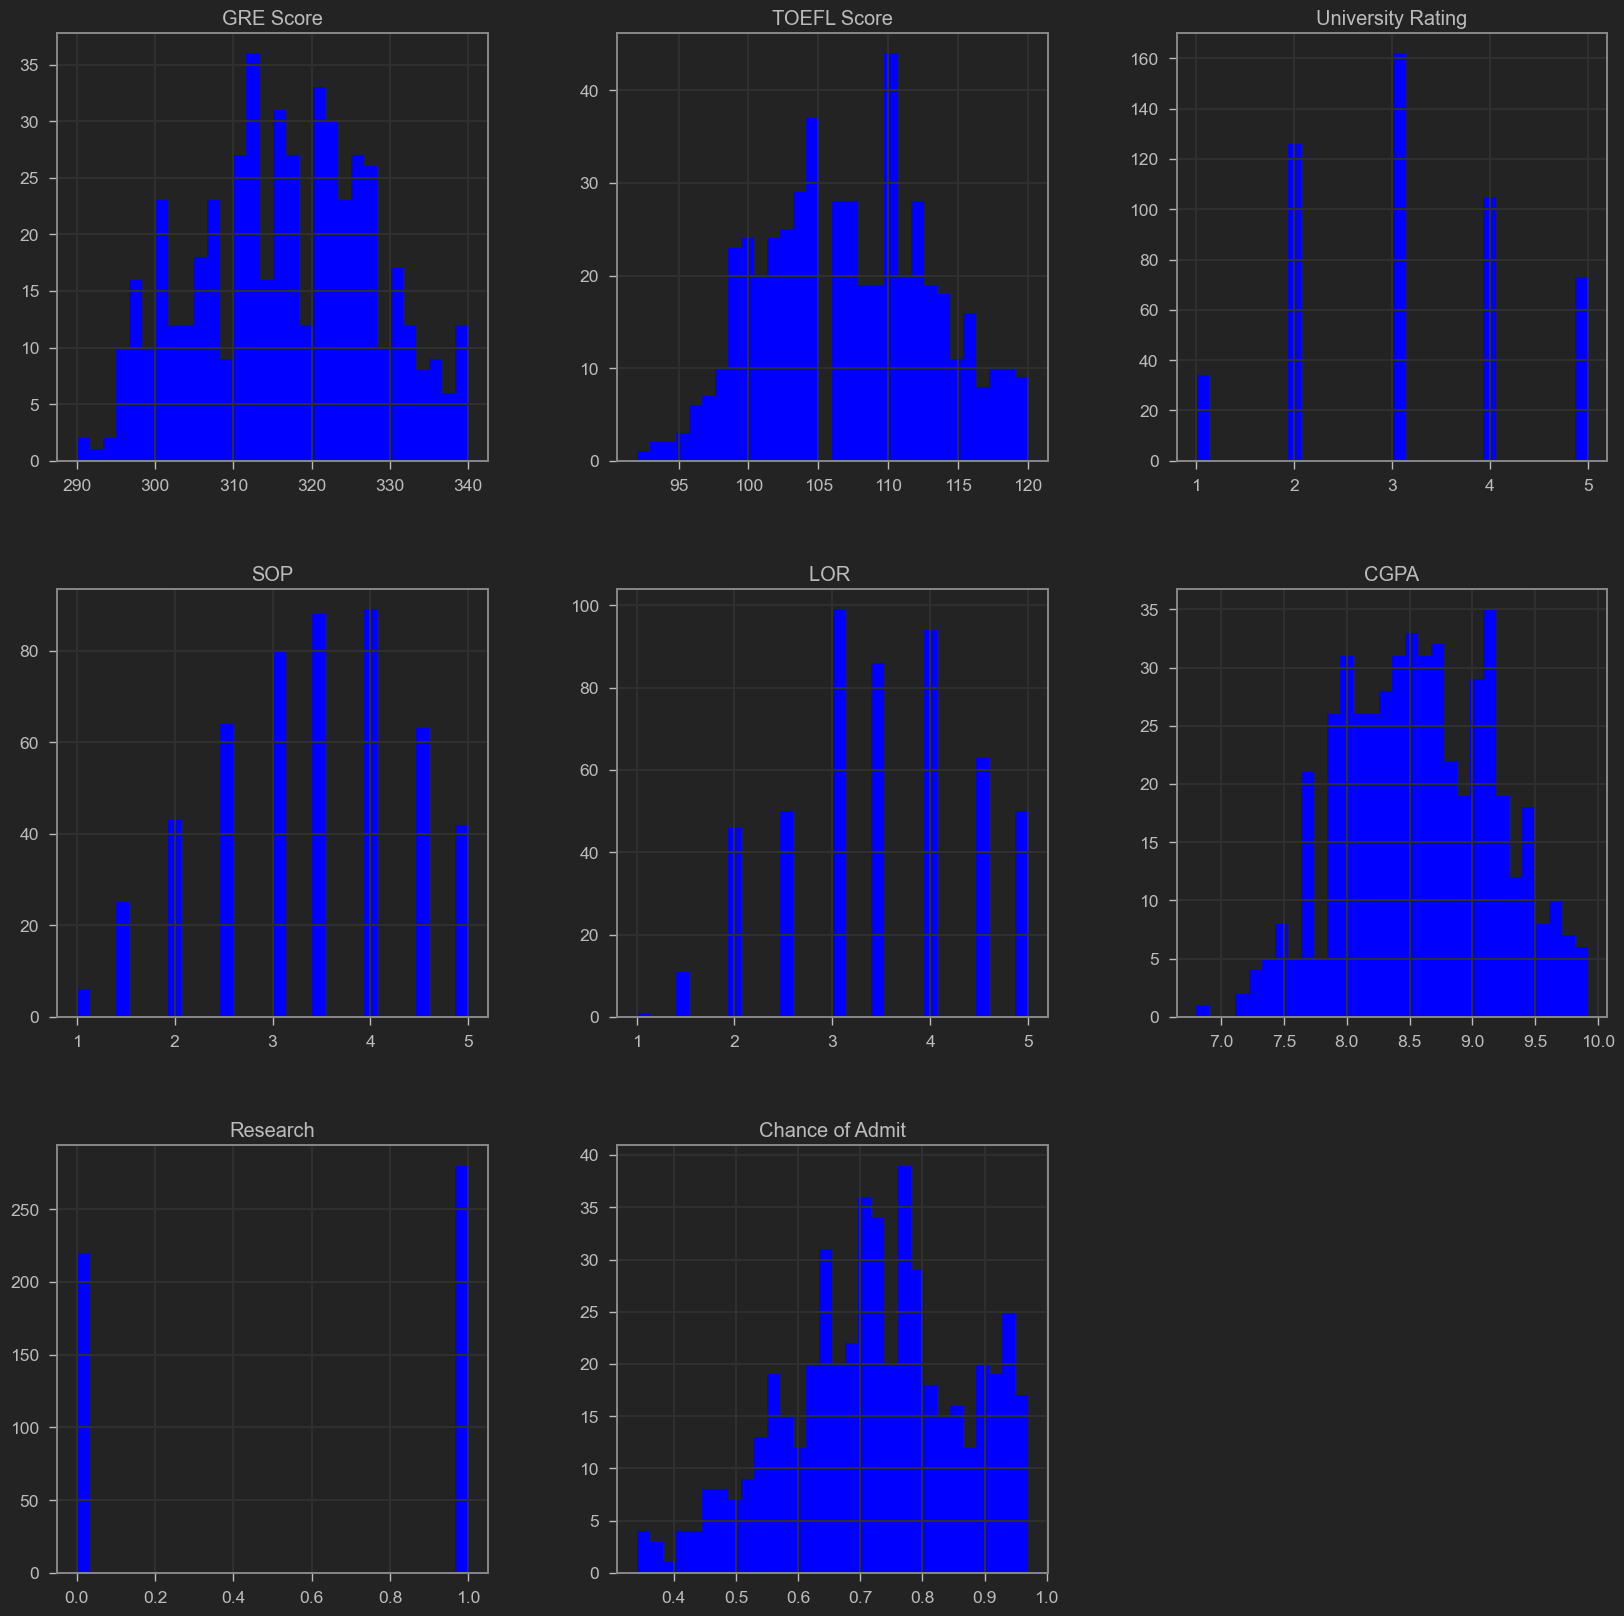

In [11]:
admission_df.hist(bins=30,figsize=(20,20),color='blue')

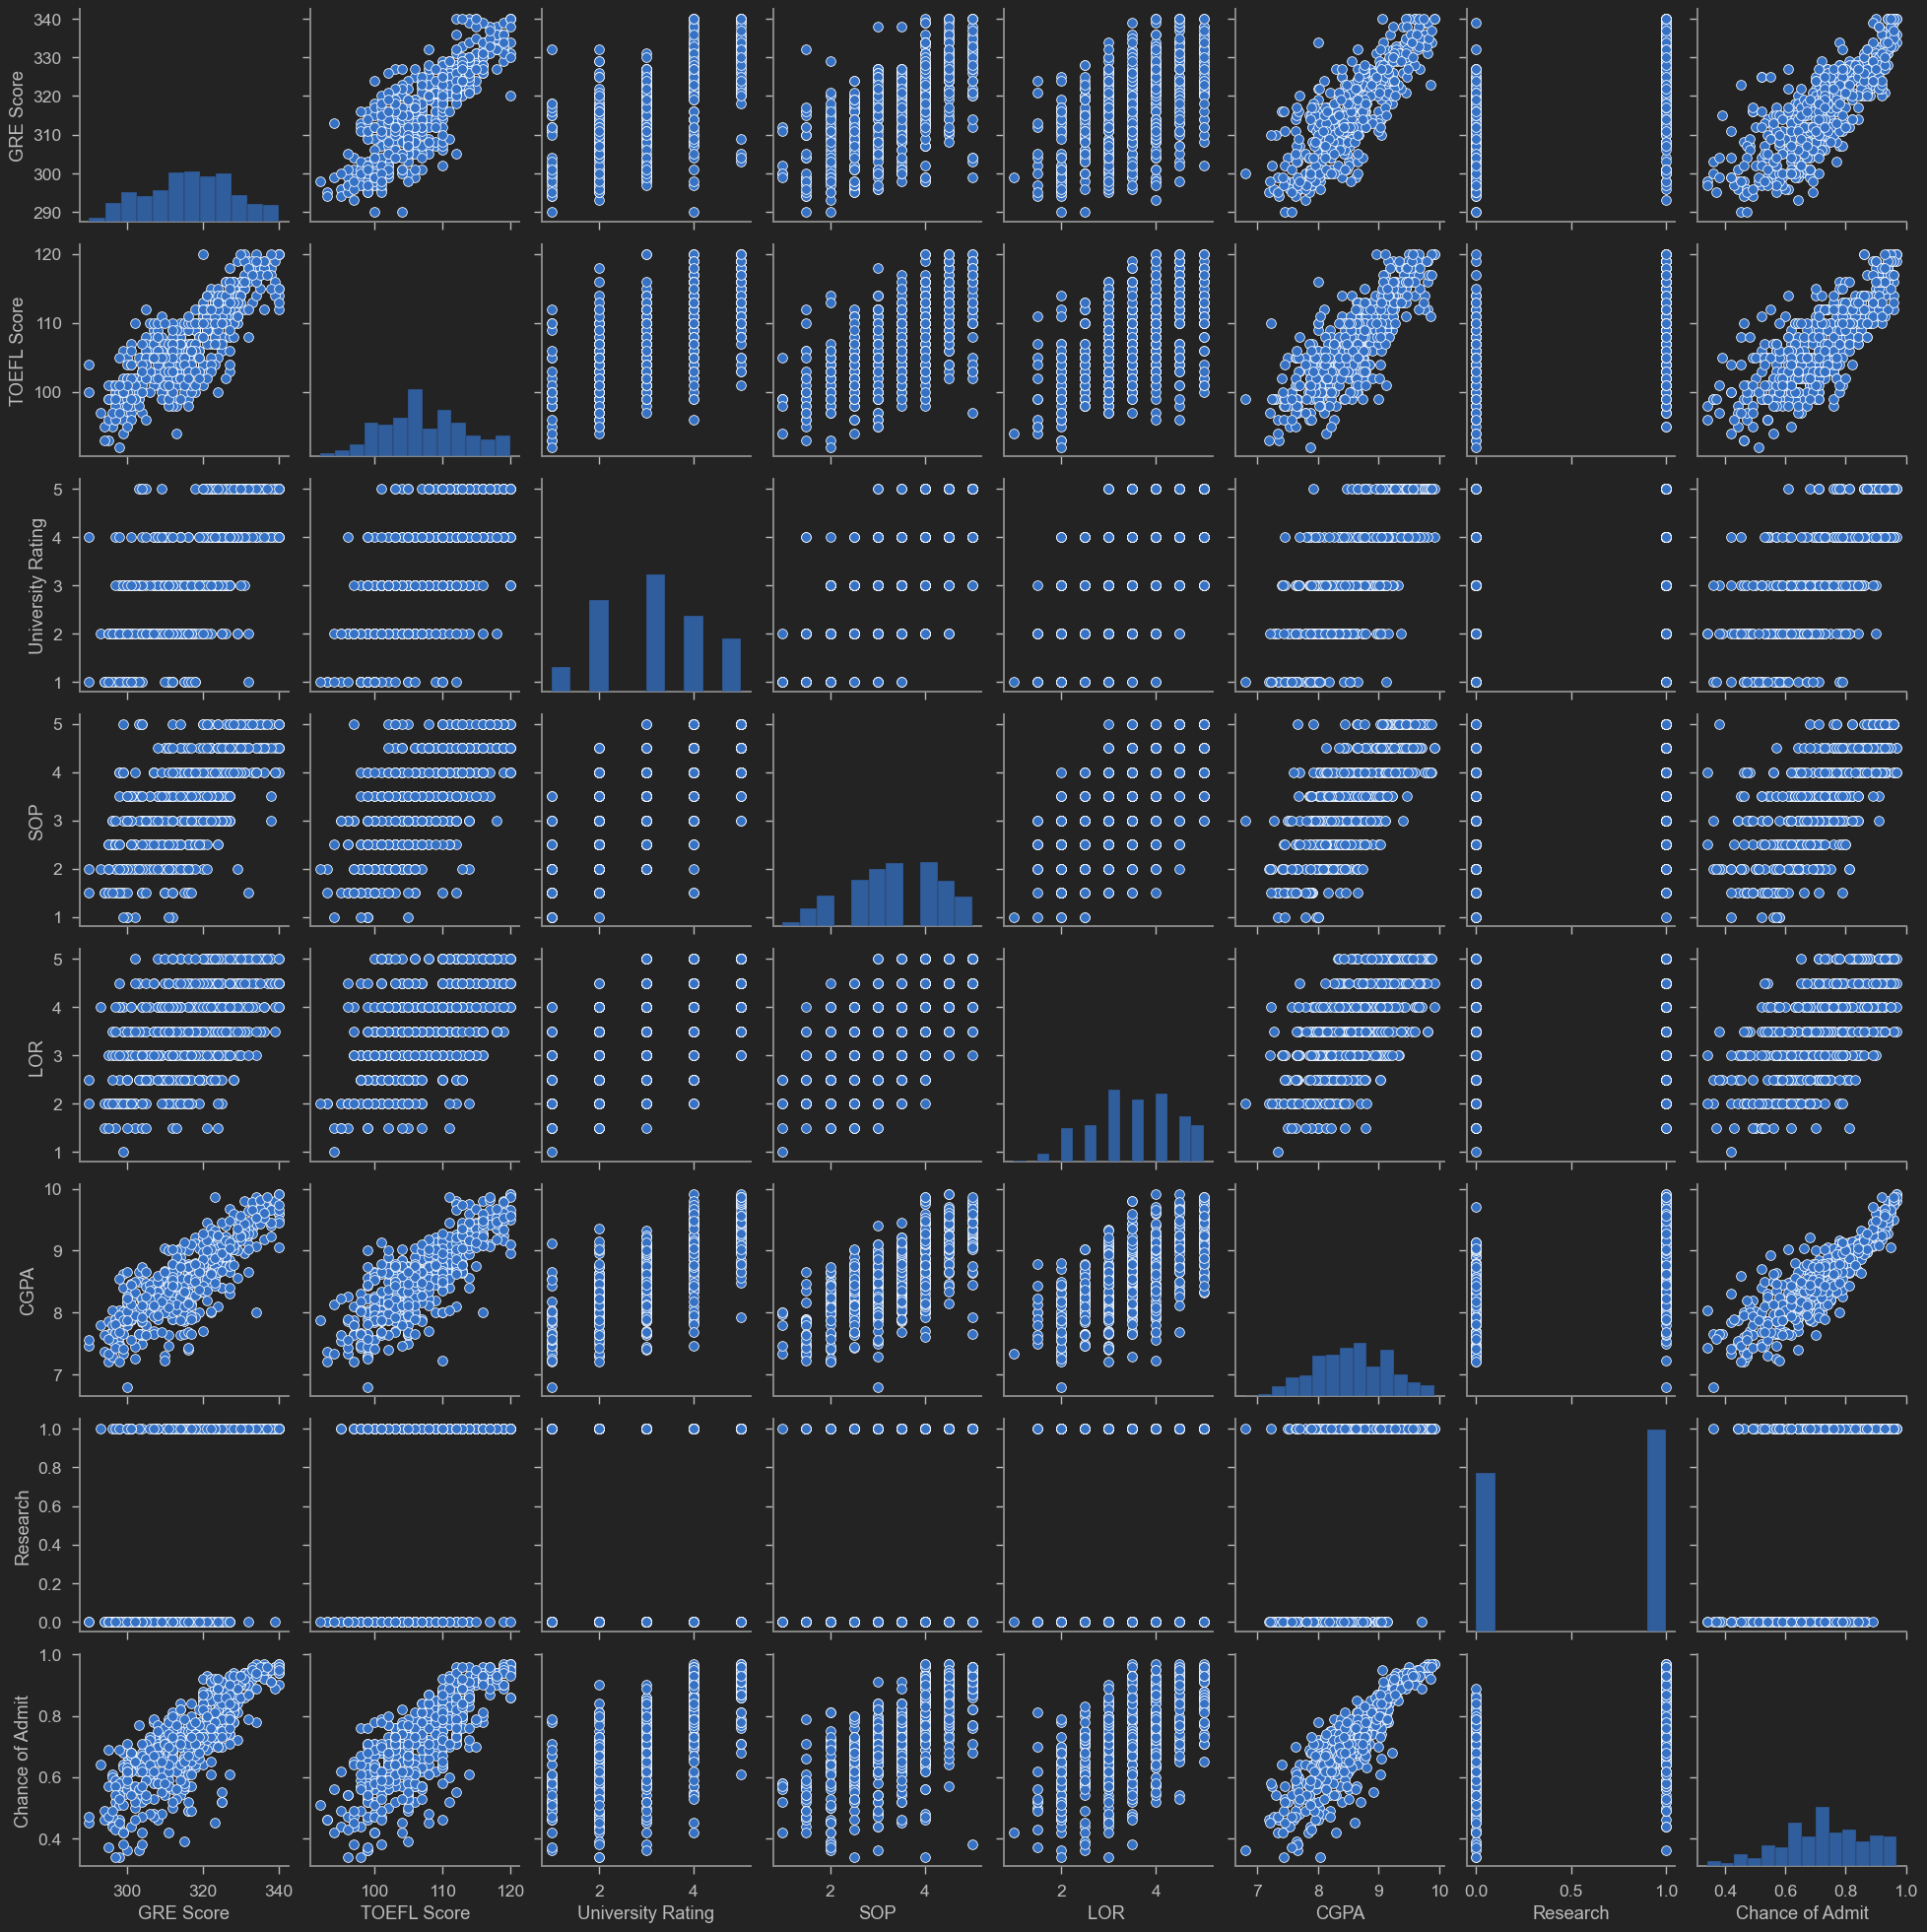

In [12]:
sns.pairplot(admission_df)

<Axes: >

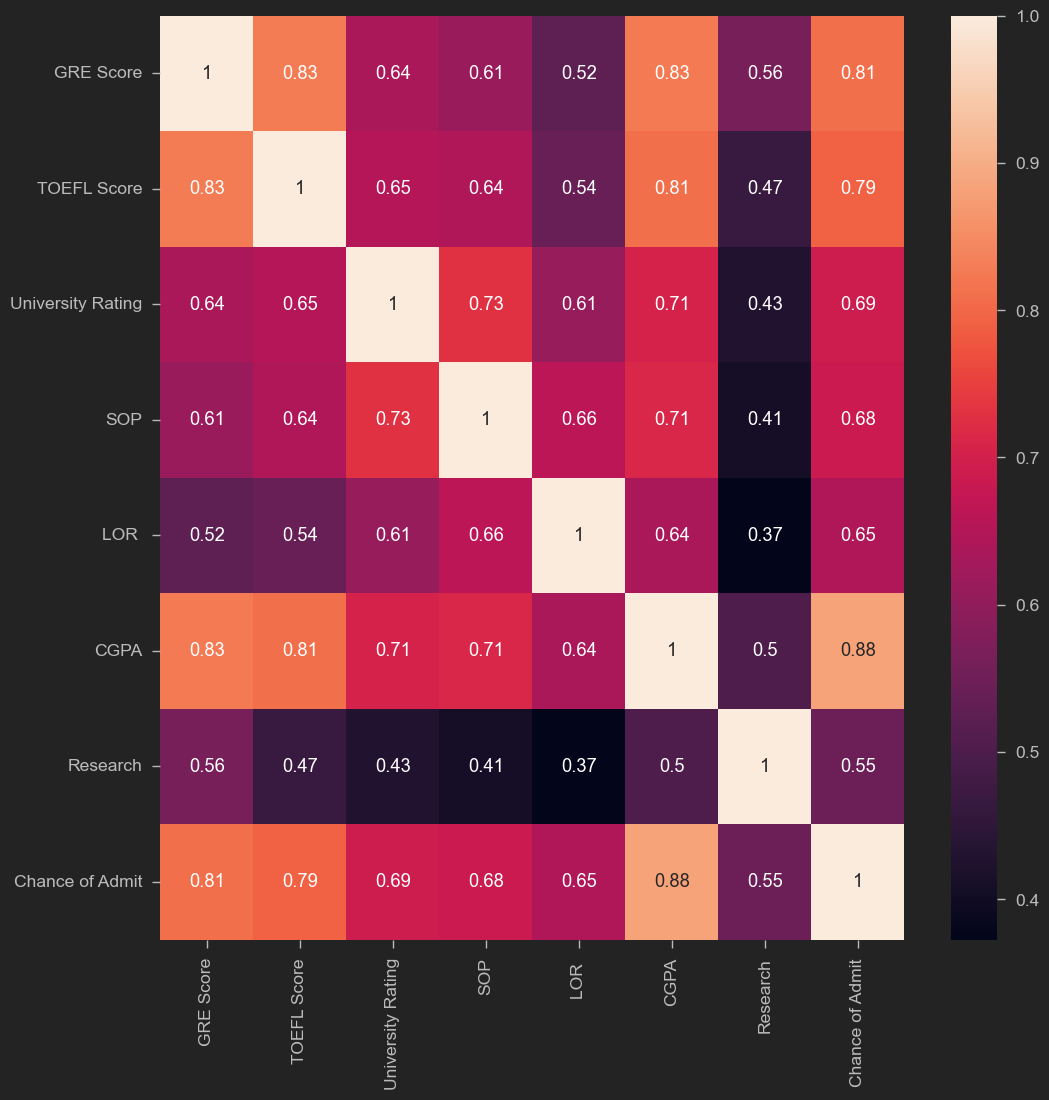

In [13]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix,annot=True)

In [14]:
X = admission_df.drop('Chance of Admit',axis =1)

In [15]:
y= admission_df['Chance of Admit']

In [16]:
X.shape

(500, 7)

In [17]:
y.shape

(500,)

In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
y =y.reshape(-1,1)
y.shape

(500, 1)

In [28]:
y

array([[ 1.40610734],
       [ 0.27134907],
       [-0.0123405 ],
       [ 0.55503864],
       [-0.50879724],
       [ 1.26426256],
       [ 0.20042668],
       [-0.29603006],
       [-1.57263312],
       [-1.92724507],
       [-1.43078833],
       [ 0.83872821],
       [ 0.41319385],
       [-0.72156441],
       [-0.79248681],
       [-1.28894355],
       [-0.43787485],
       [-0.50879724],
       [-0.65064202],
       [-0.72156441],
       [-0.57971963],
       [-0.15418528],
       [ 1.54795212],
       [ 1.61887451],
       [ 1.7607193 ],
       [ 1.54795212],
       [ 0.27134907],
       [-1.99816747],
       [-1.85632268],
       [-1.28894355],
       [-0.50879724],
       [ 0.12950429],
       [ 1.33518495],
       [ 1.26426256],
       [ 1.54795212],
       [ 1.12241777],
       [-0.57971963],
       [-1.00525398],
       [-1.43078833],
       [-1.7144779 ],
       [-1.85632268],
       [-1.64355551],
       [-1.35986594],
       [ 1.05149538],
       [ 1.33518495],
       [ 1

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
print(X.mean(axis = 0))
print(X.std(axis = 0))

[ 0.00000000e+00  1.42108547e-17 -2.84217094e-17 -2.84217094e-17
  1.42108547e-17  0.00000000e+00 -2.66453526e-17]
[1. 1. 1. 1. 1. 1. 1.]


In [30]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
print(y.mean(axis = 0))
print(y.std(axis = 0))

[-1.42108547e-17]
[1.]


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [34]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [35]:
accuracy = reg.score(X_test,y_test)
accuracy

0.8184762919703308